In [25]:
# =========================
# 0. IMPORTACIÓN DE LIBRERÍAS
# =========================
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Estilo general para gráficos
sns.set(style="whitegrid", font_scale=1.1)

In [26]:
# =========================
# 1. CARGA DEL DATASET
# =========================
df = pd.read_csv("/content/dataset-SISCO.csv", sep=";")

In [27]:
# =========================
# 2. DEFINICIÓN DE COLUMNAS POR BLOQUES
# =========================
p2_cols = [c for c in df.columns if c.startswith("P2_")]
p3_cols = [c for c in df.columns if c.startswith("P3_")]
p4_cols = [c for c in df.columns if c.startswith("P4_")]
p5_cols = [c for c in df.columns if c.startswith("P5_")]

# Preguntas totales (para estrés global %)
preguntas_cols = [c for c in df.columns if c.startswith("P")]


In [28]:
# =========================
# 3. CÁLCULO DE DIMENSIONES (X, Y, Z)
# =========================
df["X_fisico"] = df[p2_cols].mean(axis=1)
df["Y_psicologico"] = df[p3_cols + p4_cols].mean(axis=1)
df["Z_afrontamiento"] = df[p5_cols].mean(axis=1)

In [29]:
# =========================
# 4. ÍNDICE GLOBAL (PROMEDIO DE X, Y, Z)
# =========================
df["Indice_Estres_SISCO"] = df[["X_fisico", "Y_psicologico", "Z_afrontamiento"]].mean(axis=1)


In [30]:
# =========================
# 5. CLASIFICACIÓN (BAREMO 0–1–2)
# =========================
def clasificar_estres(valor: float):
    """
    Clasificación del estrés:
      0: relajado (0.00–1.33)
      1: tensión ligera (1.34–2.66)
      2: estrés (2.67–4.00)
    """
    if 0.00 <= valor <= 1.33:
        return 0
    elif 1.34 <= valor <= 2.66:
        return 1
    elif 2.67 <= valor <= 4.00:
        return 2
    return None

df["Estres_SISCO"] = df["Indice_Estres_SISCO"].apply(clasificar_estres)

In [31]:
# =========================
# 6. DATASET FINAL (RESUMEN)
# =========================
df_final = df[[
    "ID",
    "X_fisico",
    "Y_psicologico",
    "Z_afrontamiento",
    "Indice_Estres_SISCO",
    "Estres_SISCO"
]]

In [32]:
# =========================
# 7. GUARDAR CSV PROCESADO
# =========================
SALIDA_CSV = "SISCO_procesado_012.csv"
df_final.to_csv(SALIDA_CSV, index=False)

print("✅ Dataset SISCO procesado y guardado correctamente")
print(df_final)

✅ Dataset SISCO procesado y guardado correctamente
     ID  X_fisico  Y_psicologico  Z_afrontamiento  Indice_Estres_SISCO  \
0    E1       2.0       2.000000         2.000000             2.000000   
1    E2       4.0       4.000000         4.000000             4.000000   
2    E3       3.4       4.000000         4.000000             3.800000   
3    E4       2.4       2.888889         2.888889             2.725926   
4    E5       1.0       2.666667         3.333333             2.333333   
5    E6       0.8       1.777778         2.000000             1.525926   
6    E7       1.6       2.555556         2.444444             2.200000   
7    E8       0.8       1.222222         2.222222             1.414815   
8    E9       2.8       3.444444         3.000000             3.081481   
9   E10       2.8       2.444444         2.888889             2.711111   
10  E11       0.8       3.000000         2.555556             2.118519   
11  E12       1.2       2.222222         2.111111            

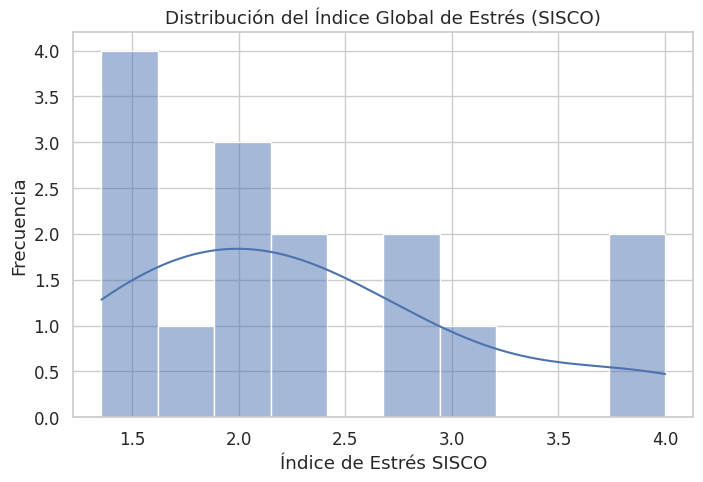

In [33]:
# =========================
# 8. GRÁFICOS PRINCIPALES
# =========================
# 8.1 Distribución del Índice Global de Estrés
plt.figure(figsize=(8, 5))
sns.histplot(df["Indice_Estres_SISCO"], bins=10, kde=True)
plt.xlabel("Índice de Estrés SISCO")
plt.ylabel("Frecuencia")
plt.title("Distribución del Índice Global de Estrés (SISCO)")
plt.show()

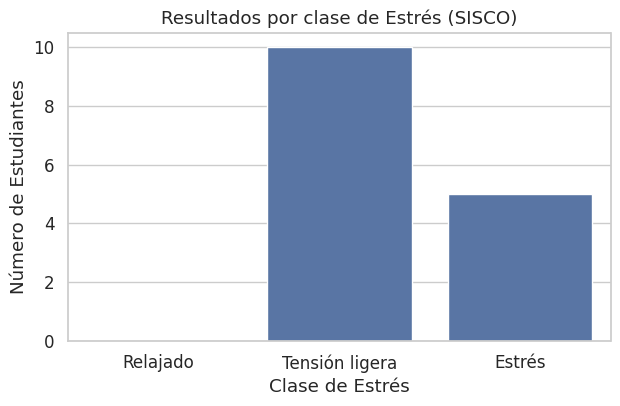

In [34]:
# Frecuencia por clase
map_clases = {
    0: "Relajado",
    1: "Tensión ligera",
    2: "Estrés"
}

df["Estres_SISCO_label"] = df["Estres_SISCO"].map(map_clases)

plt.figure(figsize=(7, 4))
sns.countplot(x="Estres_SISCO_label", data=df, order=["Relajado", "Tensión ligera", "Estrés"])
plt.xlabel("Clase de Estrés")
plt.ylabel("Número de Estudiantes")
plt.title("Resultados por clase de Estrés (SISCO)")
plt.show()


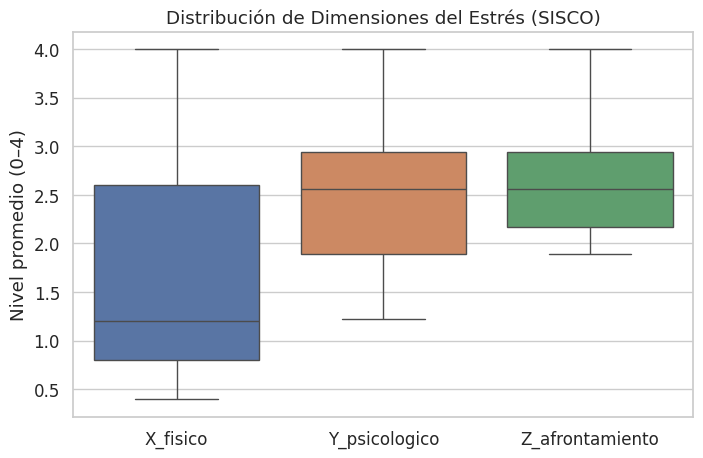

In [35]:
# Comparación entre X, Y, Z
plt.figure(figsize=(8, 5))
sns.boxplot(data=df[["X_fisico", "Y_psicologico", "Z_afrontamiento"]])
plt.ylabel("Nivel promedio (0–4)")
plt.title("Distribución de Dimensiones del Estrés (SISCO)")
plt.show()

In [40]:
# =========================
# ESTADÍSTICAS (MEDIANAS)
# =========================
x_mediana = df["X_fisico"].median()
y_mediana = df["Y_psicologico"].median()
z_mediana = df["Z_afrontamiento"].median()

print(f"Mediana de X físico: {x_mediana:.2f}")
print(f"Mediana de Y psicológico: {y_mediana:.2f}")
print(f"Mediana de Z afrontamiento: {z_mediana:.2f}")


Mediana de X físico: 1.20
Mediana de Y psicológico: 2.56
Mediana de Z afrontamiento: 2.56


In [41]:
# =========================
# PORCENTAJES PROMEDIO POR DIMENSIÓN (0–4 -> 0–100%)
# =========================
df["X_fisico_pct"] = (df["X_fisico"] / 4) * 100
df["Y_psicologico_pct"] = (df["Y_psicologico"] / 4) * 100
df["Z_afrontamiento_pct"] = (df["Z_afrontamiento"] / 4) * 100

x_pct_mean = df["X_fisico_pct"].mean()
y_pct_mean = df["Y_psicologico_pct"].mean()
z_pct_mean = df["Z_afrontamiento_pct"].mean()

print(f"X físico: {x_pct_mean:.2f}%")
print(f"Y psicológico: {y_pct_mean:.2f}%")
print(f"Z afrontamiento: {z_pct_mean:.2f}%")

X físico: 42.67%
Y psicológico: 63.52%
Z afrontamiento: 67.41%


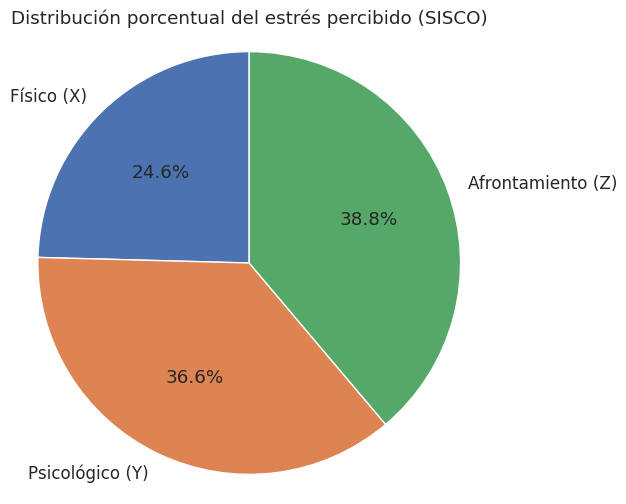

In [42]:
# Gráfico de pastel (proporción entre dimensiones)
labels = ["Físico (X)", "Psicológico (Y)", "Afrontamiento (Z)"]
sizes = [x_pct_mean, y_pct_mean, z_pct_mean]

plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct="%1.1f%%", startangle=90)
plt.title("Distribución porcentual del estrés percibido (SISCO)")
plt.axis("equal")
plt.show()

Estrés Global del Grupo: 61.84%
Nivel de Estrés del Grupo: Moderado


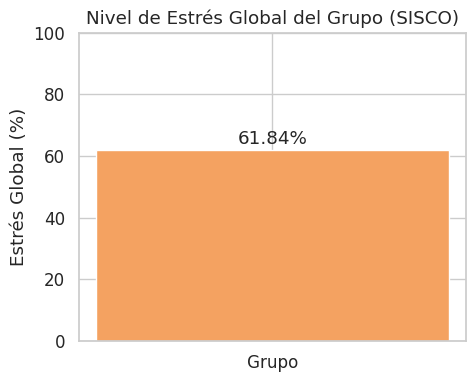

In [43]:
# =========================
# ESTRÉS GLOBAL DEL GRUPO
# =========================
df["Suma_Total"] = df[preguntas_cols].sum(axis=1)
maximo_posible = len(preguntas_cols) * 4  # escala 0–4

df["Estres_Global_Porc"] = (df["Suma_Total"] / maximo_posible) * 100
estres_grupo = df["Estres_Global_Porc"].mean()

print(f"Estrés Global del Grupo: {estres_grupo:.2f}%")


# Clasificación del nivel global del grupo
if estres_grupo < 33:
    nivel_grupo = "Bajo"
elif estres_grupo < 66:
    nivel_grupo = "Moderado"
else:
    nivel_grupo = "Alto"

print(f"Nivel de Estrés del Grupo: {nivel_grupo}")


# Gráfico del estrés global del grupo
plt.figure(figsize=(5, 4))
plt.bar(["Grupo"], [estres_grupo], color="#f4a261")
plt.ylabel("Estrés Global (%)")
plt.ylim(0, 100)
plt.title("Nivel de Estrés Global del Grupo (SISCO)")
plt.text(0, estres_grupo + 2, f"{estres_grupo:.2f}%", ha="center")
plt.show()